Text(0, 0.5, 'Min and max temperature')

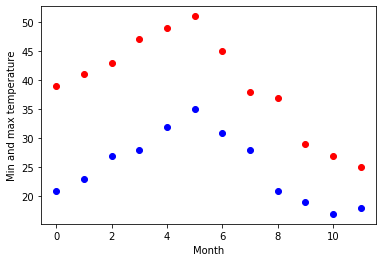

In [3]:
import numpy as np
t_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
t_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt

months = np.arange(12)
plt.plot(months, t_max, 'ro')
plt.plot(months, t_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      t_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      t_min, [-40, 20, 0])

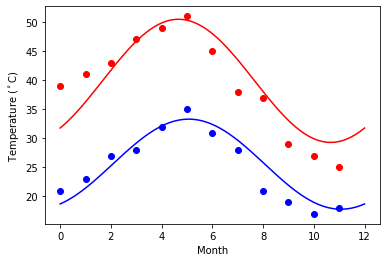

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, t_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, t_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Matplotlib: 
This assignment is for visualization using matplotlib: 
data to use: 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv titanic = pd.read_csv(url) 
Charts to plot: 
1. Create a pie chart presenting the male/female proportion 
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url) 
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


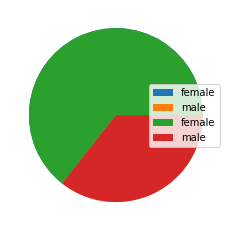

In [32]:
plt.pie(titanic['sex'].value_counts())
plt.pie(100*titanic['sex'].value_counts()/len(titanic))
plt.legend(titanic['sex'],loc='right')

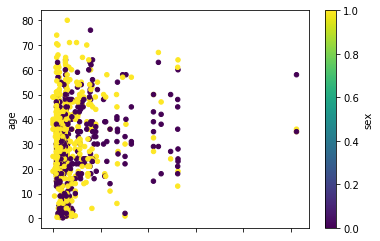

In [33]:
titanic['sex'].replace('female',0,inplace=True)
titanic['sex'].replace('male',1,inplace=True)
ax2 = titanic.plot.scatter(x='fare',
                      y='age',
                      c='sex',
                      colormap='viridis')